# **Customer Personality Analysis**

## **Context**
Customer Personality Analysis is a fascinating project that involves understanding customer behaviors, preferences, and demographics to enhance business strategies and customer experiences. 
This project typically involves unsupervised machine learning techniques to segment customers based on various attributes.
## **Objective**
The primary objective is to segment customers into different groups based on their characteristics and behaviors. 
This will help in tailoring marketing strategies, improving customer satisfaction, and optimizing business operations.

## **Data Source**
https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/data

## **Data Dictionary**

### People

ID: Customer's unique identifier 

Year_Birth: Customer's birth year

Education: Customer's education level

Marital_Status: Customer's marital status

Income: Customer's yearly household income

Kidhome: Number of children in customer's household

Teenhome: Number of teenagers in customer's household

Dt_Customer: Date of customer's enrollment with the company

Recency: Number of days since customer's last purchase

Complai*n: 1 if the customer complained in the last 2 years, 0 otherwise


### Products

MntWines: Amount spent on wine in last 2 years

MntFruits: Amount spent on fruits in last 2 years

MntMeatProducts: Amount spent on meat in last 2 years

MntFishProducts: Amount spent on fish in last 2 years

MntSweetProducts: Amount spent on sweets in last 2 years

MntGoldProds: Amount spent on gold in last 2 years


### Promotion

NumDealsPurchases: Number of purchases made with a discount

AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise

AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise

AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise

Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

### Place

NumWebPurchases: Number of purchases made through the company’s website

NumCatalogPurchases: Number of purchases made using a catalogue

NumStorePurchases: Number of purchases made directly in stores

NumWebVisitsMonth: Number of visits to company’s website in the last month



## **Importing the libraries and overview of the dataset**


In [95]:
import os
import kagglehub

import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering,DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE

from scipy.cluster.hierarchy import dendrogram, linkage


### **Loaing the dataset**


In [59]:
# Download latest version
path = kagglehub.dataset_download("imakash3011/customer-personality-analysis")
df=pd.read_csv(os.path.join(path,'marketing_campaign.csv'),delimiter='\t')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


### **Checking the info of the data**

In [60]:
print(df.columns)
print('--------------')
print(df.info())
print('--------------')
print(df.shape)
print('--------------')
print(df.describe().T)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')
--------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kid

**Observations:**
* Dataset has 2240 rows and 29 columns
* Since it has 29 columns so there is a need of dimensionality reduction, 


### **Check duplicate entries**

In [61]:
df[df.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


## **Exploratory Data Analysis**

### **Summary Statistics**

In [62]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


### **Let's check the distribution and outliers for each column in the data**

### **Data Cleaning**

In [63]:
df = df.dropna()

df['Marital_Status'] = df['Marital_Status'].replace(['Married','Together'],'Partner')
df['Marital_Status'] = df['Marital_Status'].replace(['Single','Divorced','Widow','Alone','Absurd','YOLO'],'Single')

df['Education'] = df['Education'].replace(['PhD','Master'],'Postgraduate')
df['Education'] = df['Education'].replace(['Graduation','2n Cycle'],'Graduate')
df['Education'] = df['Education'].replace(['Basic'],'Undergraduate')

df['Total_Expenses'] = df['MntFishProducts']+df['MntFruits']+df['MntGoldProds']+df['MntMeatProducts']+df['MntSweetProducts']+df['MntWines']
df['Total_Num_purchases'] = df['NumCatalogPurchases']+df['NumStorePurchases']+df['NumWebPurchases']#NumDealsPurchases,NumWebVisitsMonth
df['Total_AcceptedCmp'] = df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']+df['Response']

df['Kids'] = df['Kidhome']+df['Teenhome']
df['Age'] = 2025-df['Year_Birth']

df['Date_customer_enrollment']=pd.to_datetime(df['Dt_Customer'],format='%d-%m-%Y').dt.day

df=df.drop(columns=['Year_Birth'])
df=df.drop(columns=['Kidhome','Teenhome'])
df.drop(columns=['MntFishProducts','MntFruits','MntGoldProds','MntMeatProducts','MntSweetProducts','MntWines'],inplace=True)
df.drop(columns=['NumCatalogPurchases','NumStorePurchases','NumWebPurchases'],inplace=True)
df.drop(columns=['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5'],inplace=True)
df.drop(columns='Dt_Customer',inplace=True)
df.drop(columns='Response',inplace=True)
df.drop(columns=['ID','NumDealsPurchases','NumWebVisitsMonth','Complain','Z_CostContact','Z_Revenue'],inplace=True)
df.rename(columns={'Recency':'Days_last_purchase'},inplace=True)


/var/folders/9y/f5lmwr1n6vq9276njhgjm4c40000gn/T/ipykernel_1958/845337855.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Marital_Status'] = df['Marital_Status'].replace(['Married','Together'],'Partner')
/var/folders/9y/f5lmwr1n6vq9276njhgjm4c40000gn/T/ipykernel_1958/845337855.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Marital_Status'] = df['Marital_Status'].replace(['Single','Divorced','Widow','Alone','Absurd','YOLO'],'Single')
/var/folders/9y/f5lmwr1n6vq9276njhgjm4c40000gn/T/ipykernel

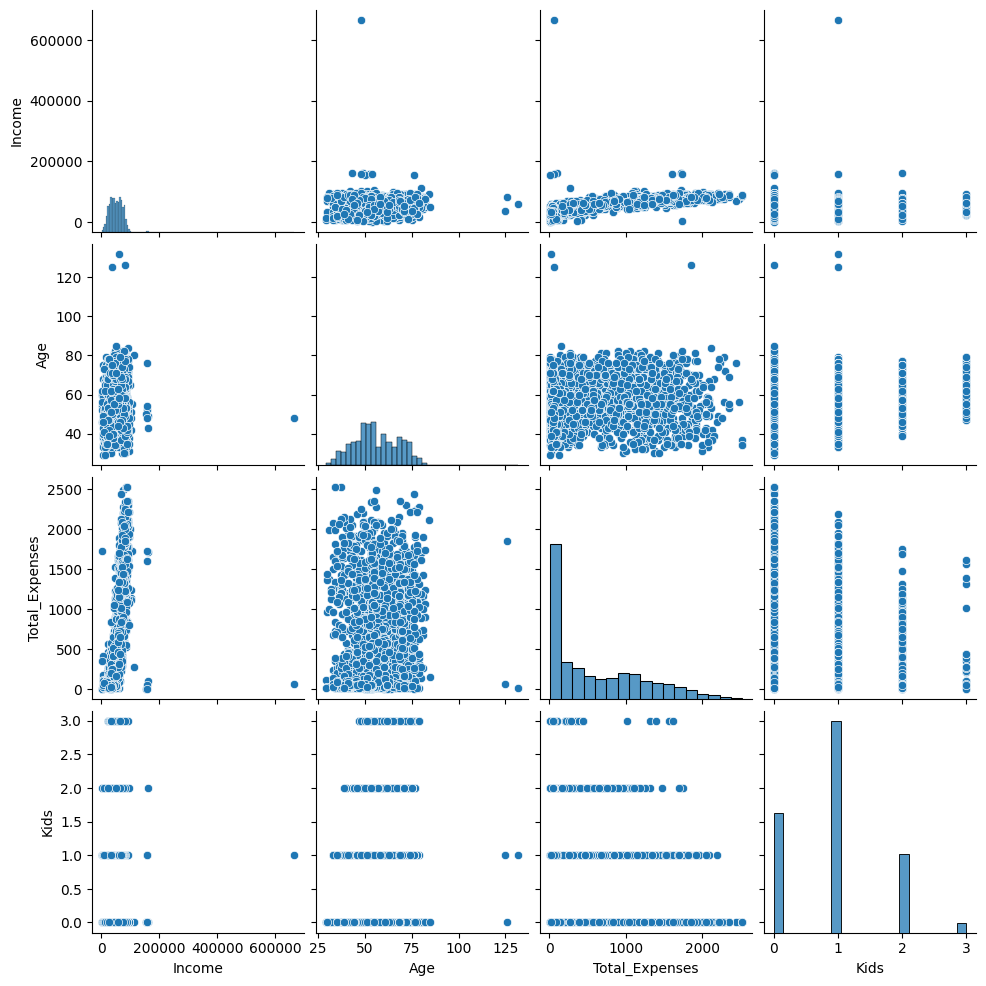

In [64]:

sns.pairplot(df[['Income','Age','Total_Expenses','Kids']])

### ** Lets look for the categorical and binomial variables**

Education
Graduate         1316
Postgraduate      846
Undergraduate      54
Name: count, dtype: int64
-----------------------------
Kids
1    1117
0     633
2     416
3      50
Name: count, dtype: int64
-----------------------------
Marital_Status
Partner    1430
Single      786
Name: count, dtype: int64
-----------------------------


<function matplotlib.pyplot.show(close=None, block=None)>

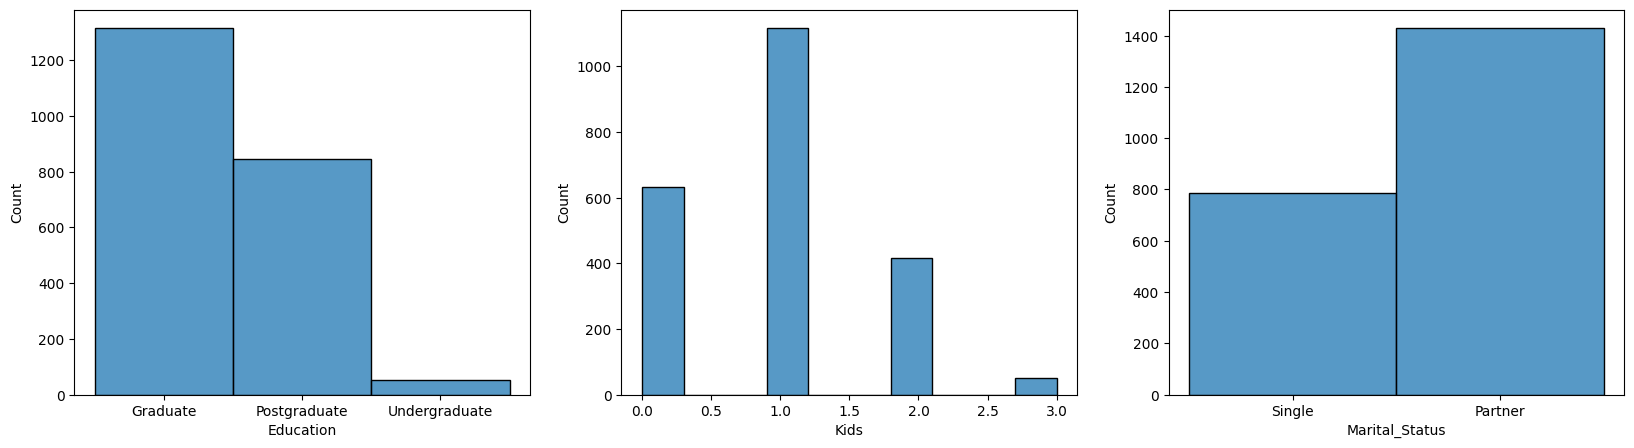

In [65]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(data=df,x='Education')
print(df['Education'].value_counts())
print('-----------------------------')
plt.subplot(1,3,2)
sns.histplot(data=df,x='Kids',bins=10)
print(df['Kids'].value_counts())
print('-----------------------------')
plt.subplot(1,3,3)
sns.histplot(data=df,x='Marital_Status',bins=10)
print(df['Marital_Status'].value_counts())
print('-----------------------------')
plt.show

### **Lets check the Numerical variables**

Income
7500.0     12
35860.0     4
37760.0     3
83844.0     3
63841.0     3
           ..
40760.0     1
41452.0     1
6835.0      1
33622.0     1
52869.0     1
Name: count, Length: 1974, dtype: int64


<Axes: xlabel='Total_AcceptedCmp', ylabel='Count'>

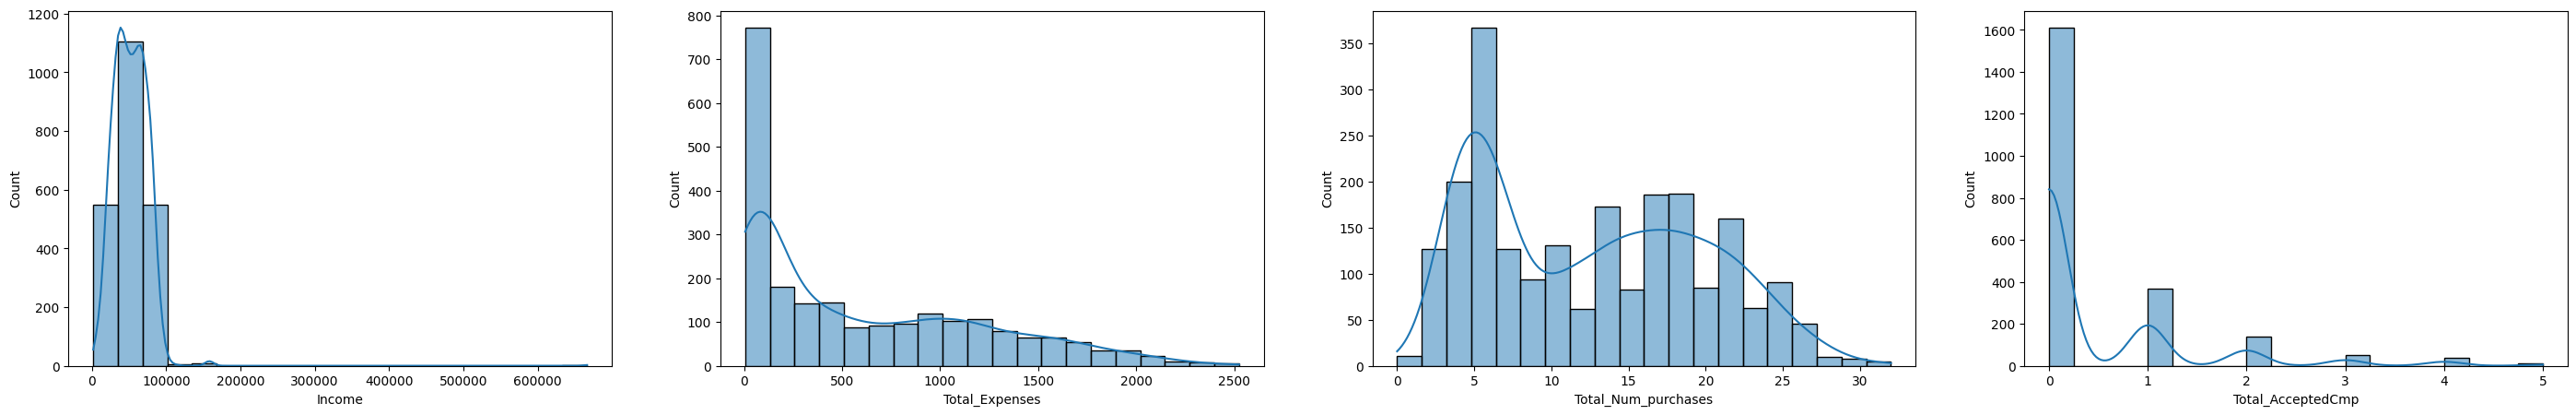

In [66]:
plt.figure(figsize=(35,5))
plt.subplot(1,4,1)
sns.histplot(data=df,x='Income',bins=20,kde=True)
print(df['Income'].value_counts())

plt.subplot(1,4,2)
sns.histplot(data=df,x='Total_Expenses',bins=20,kde=True)

plt.subplot(1,4,3)
sns.histplot(data=df,x='Total_Num_purchases',bins=20,kde=True)

plt.subplot(1,4,4)
sns.histplot(data=df,x='Total_AcceptedCmp',bins=20,kde=True)


<Axes: xlabel='Income'>

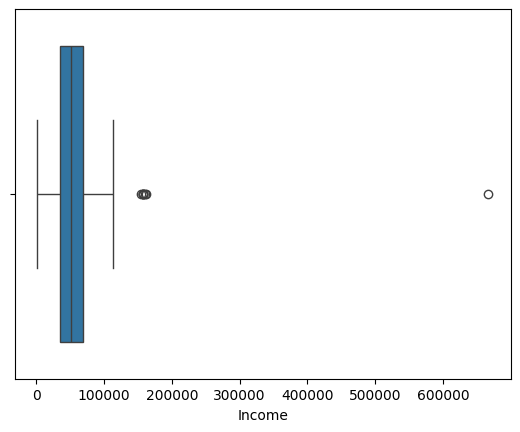

In [67]:
sns.boxplot(data=df,x='Income')

**Observations**
Since there are outlier in the income column,lets remove the rows which ae having more than 100000 income

<Axes: xlabel='Income'>

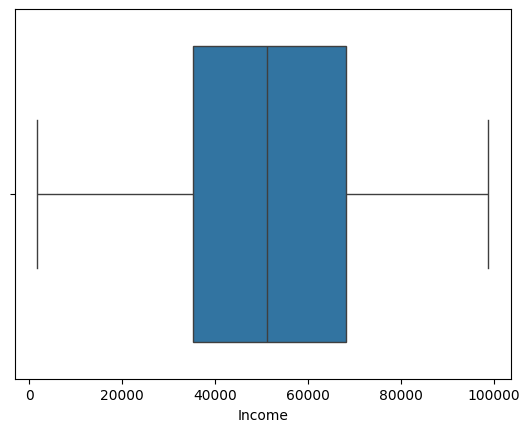

In [68]:
df = df[df['Income']<=100000]
sns.boxplot(data=df,x='Income')

<Axes: xlabel='Age', ylabel='Count'>

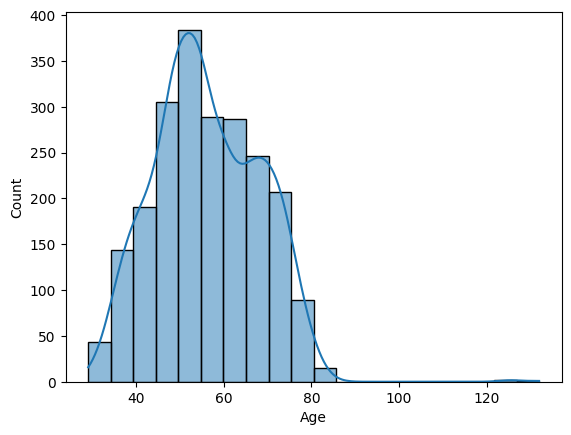

In [69]:
sns.histplot(data=df,x='Age',bins=20,kde=True)

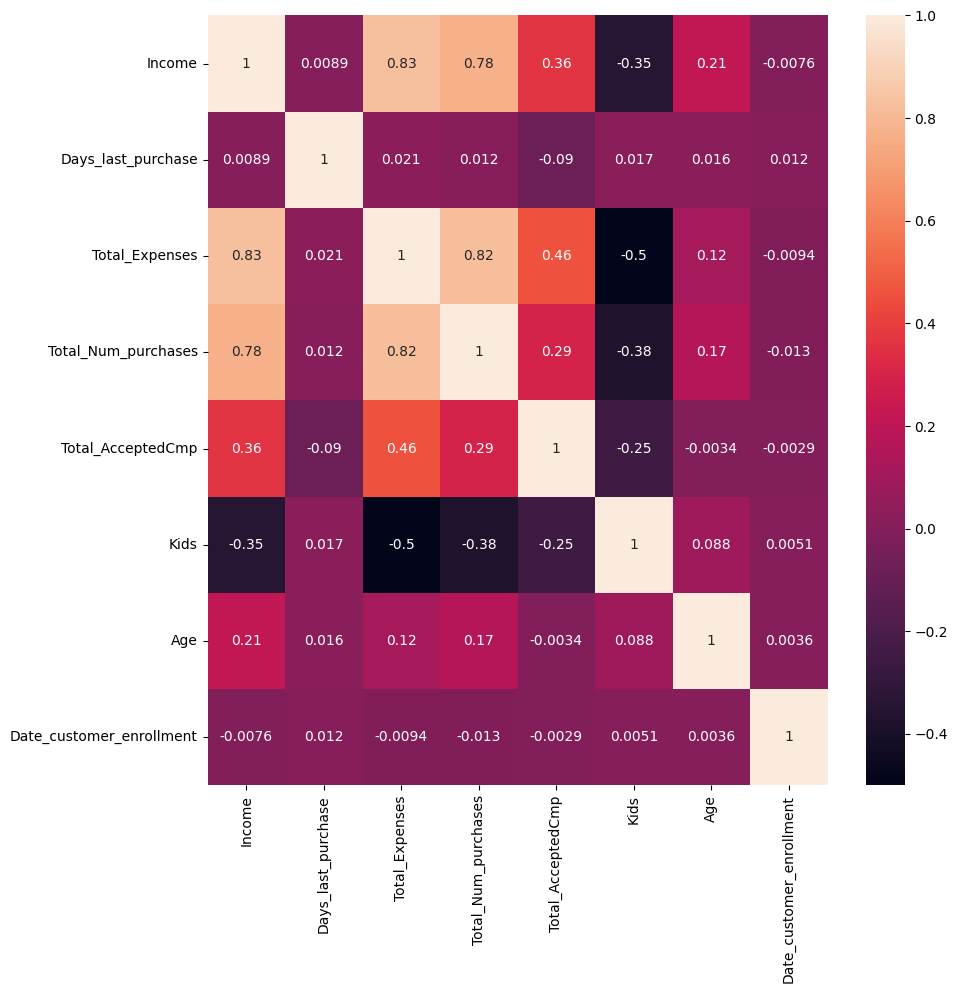

In [52]:
corr_df = df.corr(numeric_only=True)
# sns.heatmap(corr_df,annot=True)

plt.figure(figsize=(10,10))
sns.heatmap(corr_df,  annot=True)
plt.show()

In [70]:

numerical_df = df[[col for col in df.columns if df[col].dtypes in ['int64','float64']]]
categorical_df = df[[col for col in df.columns if df[col].dtypes in ['object']]]

In [54]:
df.head()

,Education,Marital_Status,Income,Days_last_purchase,Total_Expenses,Total_Num_purchases,Total_AcceptedCmp,Kids,Age,Date_customer_enrollment
0,Graduate,Single,58138.0,58,1617,22,1,0,68,4
1,Graduate,Single,46344.0,38,27,4,0,2,71,8
2,Graduate,Partner,71613.0,26,776,20,0,0,60,21
3,Graduate,Partner,26646.0,26,53,6,0,1,41,10
4,Postgraduate,Partner,58293.0,94,422,14,0,1,44,19


In [71]:
original_df = df.copy()
#Converting categorical into numerical
for col in categorical_df.columns:
    df[col] = LabelEncoder().fit_transform(df[col])
#scaling
scaled_df = StandardScaler().fit_transform(df)
df_Scaled = pd.DataFrame(scaled_df,columns=df.columns)
df_Scaled

,Education,Marital_Status,Income,Days_last_purchase,Total_Expenses,Total_Num_purchases,Total_AcceptedCmp,Kids,Age,Date_customer_enrollment
0,-0.792654,1.348012,0.322070,0.309453,1.680434,1.324597,0.631179,-1.270226,0.984846,-1.332632
1,-0.792654,1.348012,-0.251205,-0.381811,-0.961763,-1.192683,-0.503913,1.402465,1.235129,-0.876215
2,-0.792654,-0.741833,0.977053,-0.796570,0.282894,1.044899,-0.503913,-1.270226,0.317426,0.607140
3,-0.792654,-0.741833,-1.208672,-0.796570,-0.918558,-0.912985,-0.503913,0.066120,-1.267697,-0.648006
4,1.051292,-0.741833,0.329604,1.553729,-0.305368,0.205806,-0.503913,0.066120,-1.017414,0.378932
...,...,...,...,...,...,...,...,...,...,...
2198,-0.792654,-0.741833,0.472023,-0.105306,1.221788,0.485504,-0.503913,0.066120,0.150571,-0.305694
2199,1.051292,-0.741833,0.607686,0.240327,-0.268810,0.345655,0.631179,2.738811,1.902549,-0.648006
2200,-0.792654,1.348012,0.265831,1.450040,1.055612,0.765201,0.631179,-1.270226,-1.017414,1.063557
2201,1.051292,-0.741833,0.861951,-1.418708,0.394232,1.184748,-0.503913,0.066120,1.068274,0.949453


In [73]:
original_df

,Education,Marital_Status,Income,Days_last_purchase,Total_Expenses,Total_Num_purchases,Total_AcceptedCmp,Kids,Age,Date_customer_enrollment
0,Graduate,Single,58138.0,58,1617,22,1,0,68,4
1,Graduate,Single,46344.0,38,27,4,0,2,71,8
2,Graduate,Partner,71613.0,26,776,20,0,0,60,21
3,Graduate,Partner,26646.0,26,53,6,0,1,41,10
4,Postgraduate,Partner,58293.0,94,422,14,0,1,44,19
...,...,...,...,...,...,...,...,...,...,...
2235,Graduate,Partner,61223.0,46,1341,16,0,1,58,13
2236,Postgraduate,Partner,64014.0,56,444,15,1,3,79,10
2237,Graduate,Single,56981.0,91,1241,18,1,0,44,25
2238,Postgraduate,Partner,69245.0,8,843,21,0,1,69,24


### **Clustering**

### **KMeans**

Text(0.5, 1.0, 'Elbow Method for determining optimal number of clusters')

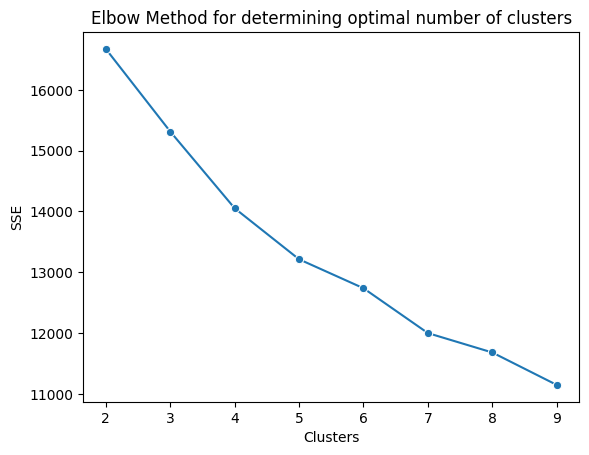

In [74]:

df_clustering = original_df.copy()
ssd = {}
for k in range(2,10):
    kmean = KMeans(n_clusters=k)
    kmean.fit(df_Scaled)
    labels = kmean.predict(df_Scaled)
    ssd[k]=kmean.inertia_


sns.lineplot(x=ssd.keys(),y=ssd.values(),marker='o')
plt.xlabel('Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for determining optimal number of clusters')


Text(0.5, 1.0, 'silhouette_score  to determine optimal number of clusters')

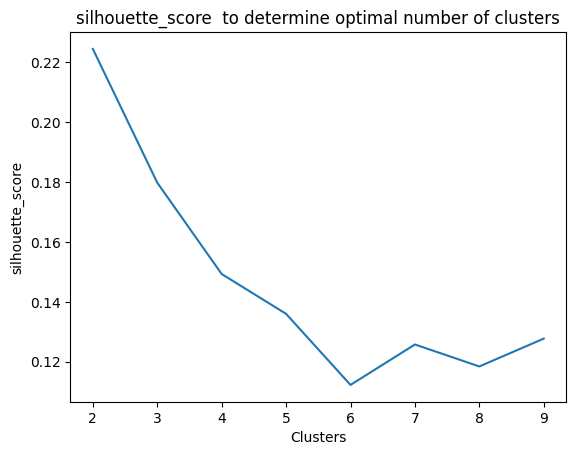

In [75]:
sscore = {}
for k in range(2,10):
    kmean = KMeans(n_clusters=k)
    kmean.fit(df_Scaled)
    labels = kmean.predict(df_Scaled)
    sscore[k]=silhouette_score(df_Scaled,labels)
sns.lineplot(x=sscore.keys(),y=sscore.values())
plt.xlabel('Clusters')
plt.ylabel('silhouette_score')
plt.title('silhouette_score  to determine optimal number of clusters')

**Observations:**
The above elbow plot clarly shows that the  optimal number of clusters is 3

<Axes: xlabel='Income', ylabel='Total_Expenses'>

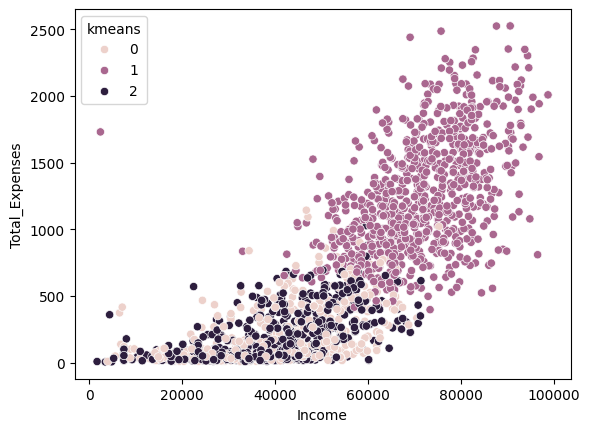

In [76]:
km=KMeans(n_clusters=3,random_state=1,max_iter=50)
df_clustering['kmeans']=km.fit_predict(df_Scaled)

plt.Figure(figsize=(10,10))
sns.scatterplot(data=df_clustering,x='Income',y='Total_Expenses',hue='kmeans')


**The Above plot shows customers with high income , low income an medium**

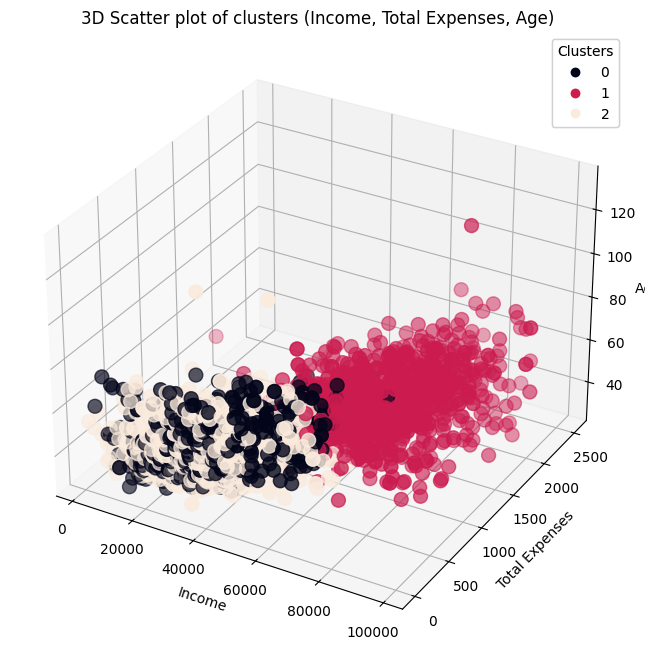

In [77]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df_clustering['Income'], df_clustering['Total_Expenses'], df_clustering['Age'], 
                     c=df_clustering['kmeans'], cmap='rocket', s=100)

ax.set_xlabel('Income')
ax.set_ylabel('Total Expenses')
ax.set_zlabel('Age')
plt.title('3D Scatter plot of clusters (Income, Total Expenses, Age)')
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
plt.show()

<Axes: xlabel='Income', ylabel='Total_Num_purchases'>

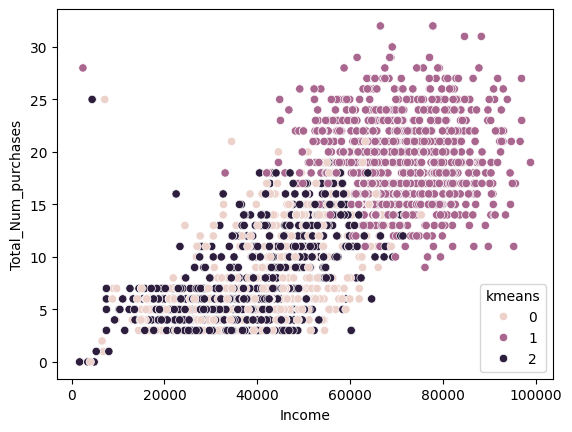

In [78]:
plt.Figure(figsize=(10,10))
sns.scatterplot(data=df_clustering,x='Income',y='Total_Num_purchases',hue='kmeans',)


#### **TSNE**
T-distributed Stochastic Neighbor Embedding" is a powerful machine learning algorithm primarily used for visualizing high-dimensional data by reducing its dimensions to 2 or 3, while preserving the structure and relationships between data points.

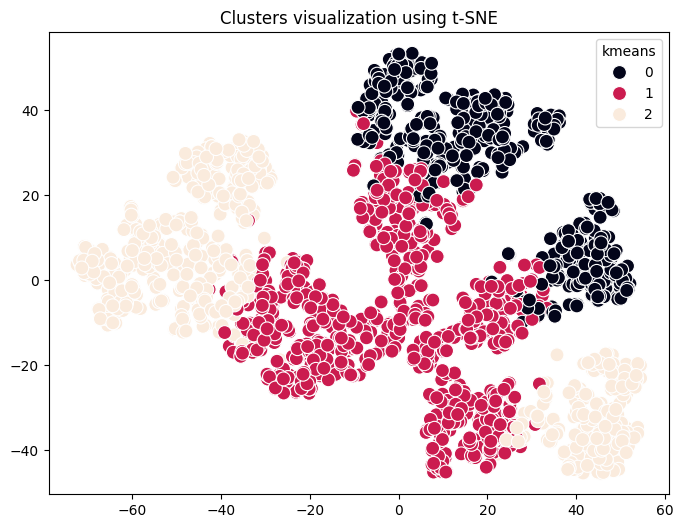

In [79]:
tsne = TSNE(n_components=2, random_state=42)
tsne_features = tsne.fit_transform(scaled_df)

plt.figure(figsize=(8,6))
sns.scatterplot(x=tsne_features[:,0], y=tsne_features[:,1], hue=df_clustering['kmeans'], palette='rocket', s=100)
plt.title('Clusters visualization using t-SNE')
plt.show()

#### **Silhouette score for Kmeans with n=3**


In [92]:
sc_avg = silhouette_score(df_Scaled,df_clustering['kmeans'])
print(f'Silhouette Score: {sc_avg}')
sscore = {}
sscore['kmeans'] = sc_avg

Silhouette Score: 0.150433194536909


Lets trying dimensionality reduction to improve the Lets trying dimensionality reduction to improve the 

#### **Dimensionality Reduction with PCA** 

In [93]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(df_Scaled)

kmeans_pca = KMeans(n_clusters=3,n_init=20, random_state=42)
df_clustering['kmeans_PCA'] = kmeans_pca.fit_predict(pca_features)
sc_avg = silhouette_score(df_Scaled,df_clustering['kmeans_PCA'])
print(f'Silhouette Score: {sc_avg}')
sscore['kmeans_pca'] = sc_avg

Silhouette Score: 0.13845736049177385


Text(0.5, 1.0, 'KMeansClustering with PCA')

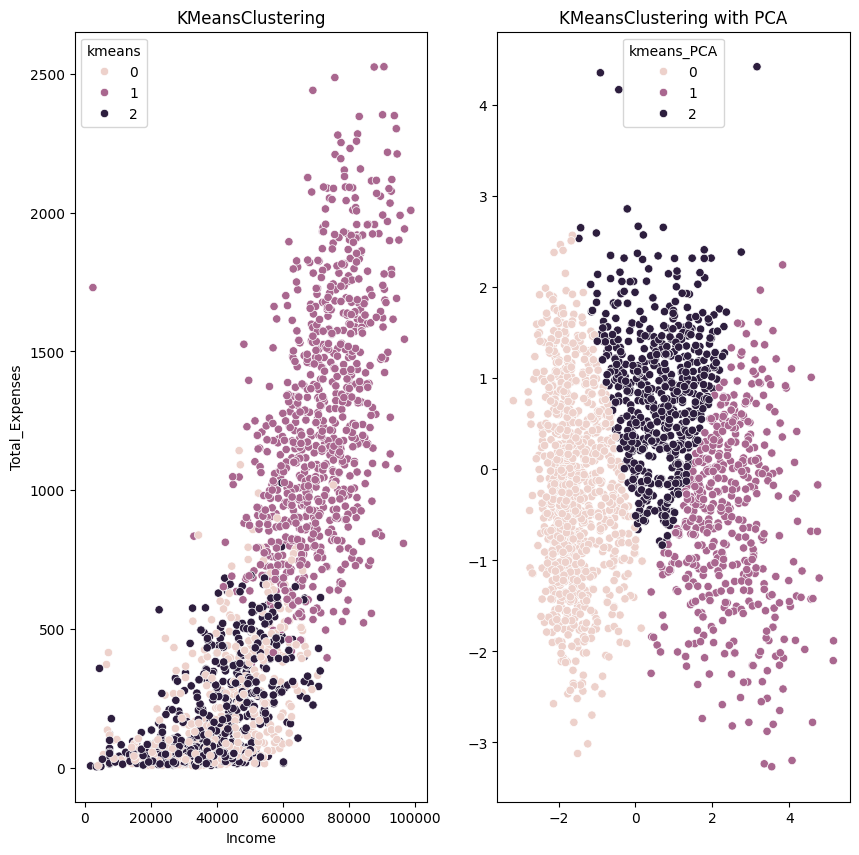

In [82]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
sns.scatterplot(data=df_clustering,x='Income',y='Total_Expenses',hue='kmeans')
plt.title('KMeansClustering')

plt.subplot(1,2,2)
sns.scatterplot(data=df_clustering,x=pca_features[:,0],y=pca_features[:,1],hue='kmeans_PCA')
plt.title('KMeansClustering with PCA')

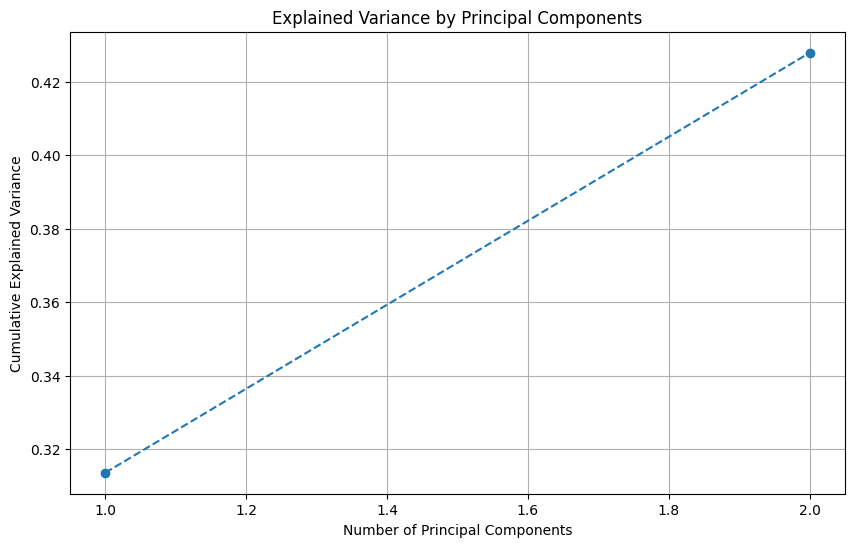

Explained variance by each principal component: [0.31354868 0.11438442]
Total variance explained by PCA: 0.4279330920560655


In [ ]:

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by each principal component: {explained_variance}')
print(f'Total variance explained by PCA: {sum(explained_variance)}')



In [84]:
#So lets consider 90% of variance by considering first 8 components
pca=PCA(n_components=9).fit_transform(df_Scaled)
pca_df = pd.DataFrame(data=pca,columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9'])
pca_df


,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9
0,2.492553,-0.140457,-0.201974,-0.104825,-1.947585,-0.467329,-0.236838,-0.862930,-0.732638
1,-1.660348,0.784892,0.335110,-0.133524,-1.670815,-1.677805,0.286786,-0.064631,0.564070
2,1.462845,-0.073557,-0.464726,-0.389539,1.079809,-0.727313,-1.238664,-0.461539,0.043313
3,-1.847587,-1.425670,-0.344046,-1.199415,0.340148,-0.166263,-0.247291,-0.041566,-0.145515
4,-0.230378,0.314837,-0.835317,0.467897,0.491512,1.897149,-0.067084,0.758921,0.181162
...,...,...,...,...,...,...,...,...,...
2198,0.981452,0.274720,-0.837467,-0.849495,0.255965,-0.406080,-0.382323,0.312837,0.038765
2199,-0.213355,2.861303,0.853962,-0.924340,-0.243708,-0.230824,1.745267,1.085921,-0.026712
2200,1.618008,-1.283587,-1.268705,2.046508,-0.407660,0.317884,0.066996,-0.148854,-0.324312
2201,1.124169,1.343424,1.254096,-0.230864,1.436384,-0.434663,-1.009668,0.433915,-0.186026


In [85]:
df_clustering.columns

Index(['Education', 'Marital_Status', 'Income', 'Days_last_purchase',
       'Total_Expenses', 'Total_Num_purchases', 'Total_AcceptedCmp', 'Kids',
       'Age', 'Date_customer_enrollment', 'kmeans', 'kmeans_PCA'],
      dtype='object')

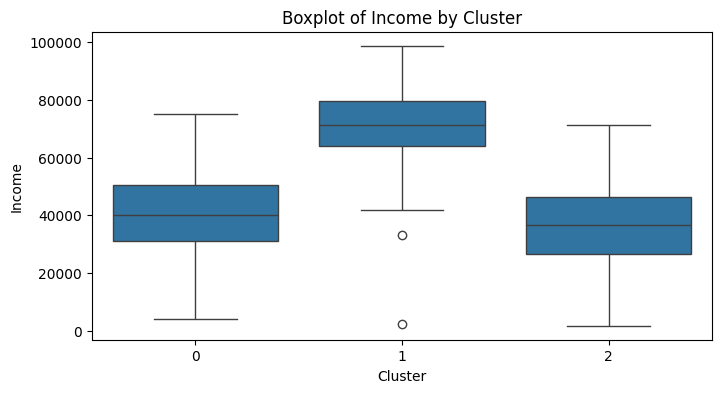

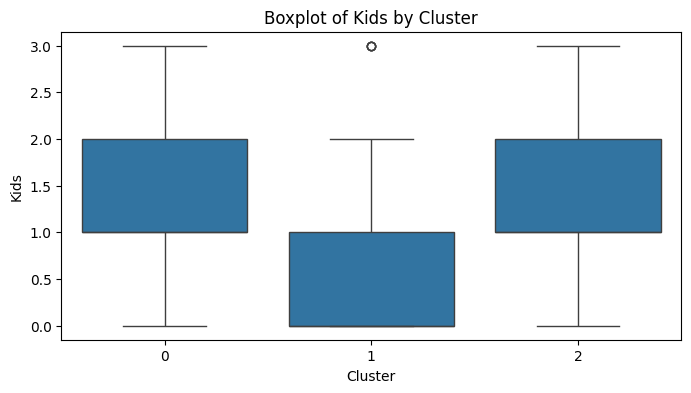

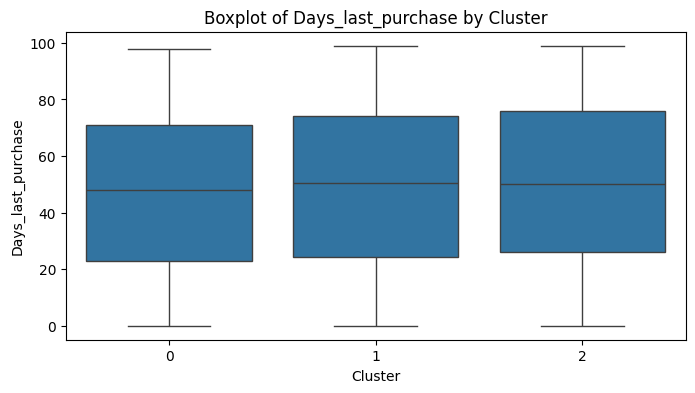

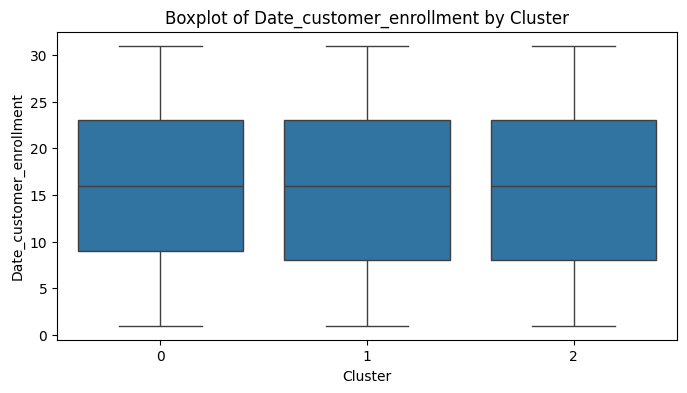

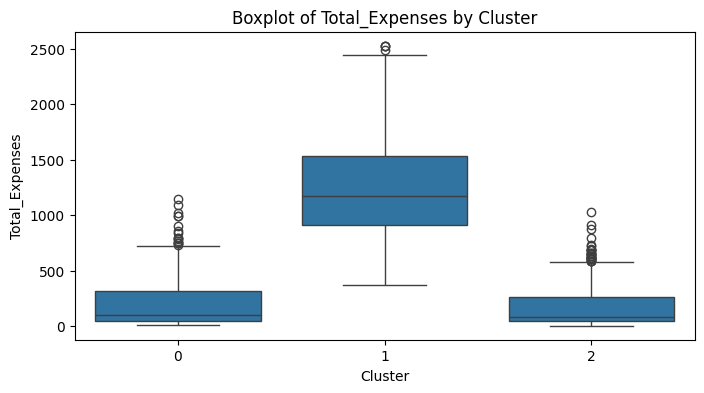

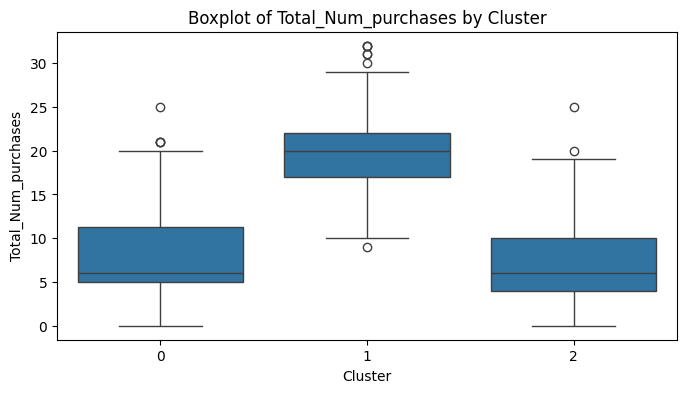

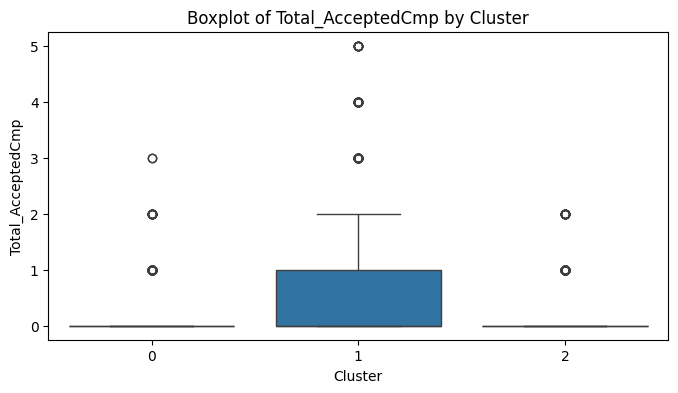

In [98]:


# Select numerical columns to plot
columns_to_plot = ['Income', 'Kids', 'Days_last_purchase', 'Date_customer_enrollment', 'Total_Expenses', 'Total_Num_purchases', 'Total_AcceptedCmp'] 

# Plot boxplots for each numerical column
for column in columns_to_plot:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='kmeans', y=column, data=df_clustering)
    plt.title(f'Boxplot of {column} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(column)
    plt.show()

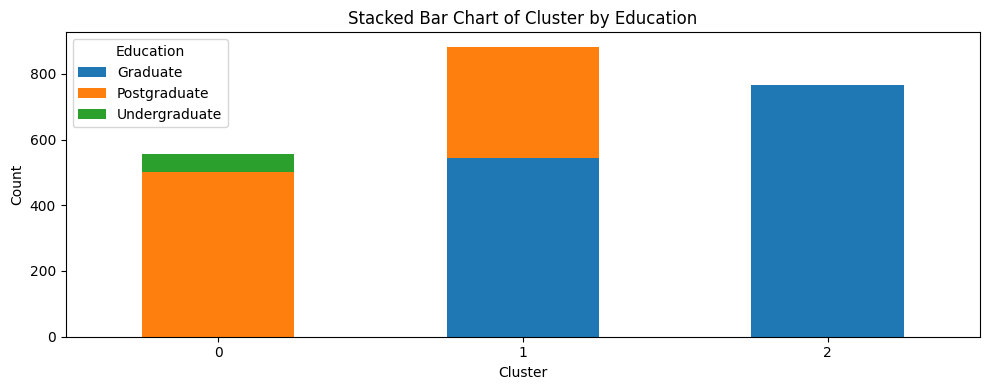

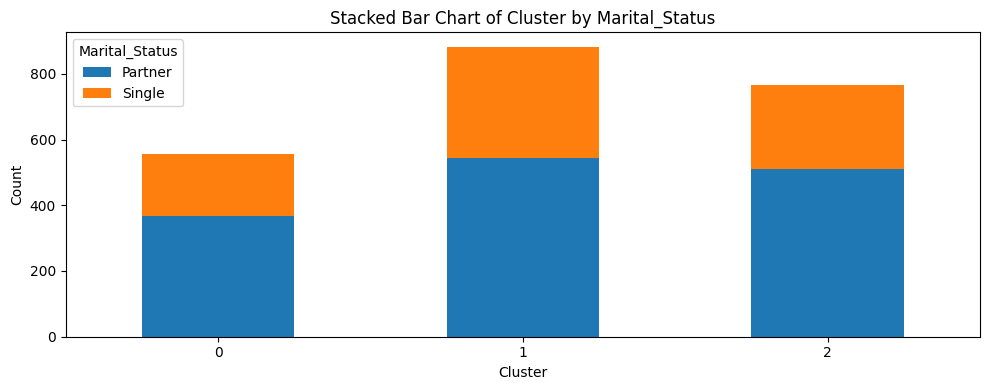

In [102]:
# List of categorical columns to plot
categorical_columns = ['Education', 'Marital_Status']

for column in categorical_columns:
    # Prepare data
    data = df_clustering.groupby(['kmeans', column]).size().unstack().fillna(0)
    
    # Plot stacked bar chart
    data.plot(kind='bar', stacked=True, figsize=(10, 4))

    plt.title(f'Stacked Bar Chart of Cluster by {column}')
    plt.xlabel('Cluster')
    plt.ylabel('Count')
    plt.legend(title=column)
    plt.xticks(rotation=0)
    plt.tight_layout() 
    plt.show()

In [37]:
df_clustering.head()

,Education,Marital_Status,Income,Days_last_purchase,Total_Expenses,Total_Num_purchases,Total_AcceptedCmp,Kids,Age,Date_customer_enrollment,kmeans
0,0,1,58138.0,58,1617,22,1,0,68,4,1
1,0,1,46344.0,38,27,4,0,2,71,8,2
2,0,0,71613.0,26,776,20,0,0,60,21,1
3,0,0,26646.0,26,53,6,0,1,41,10,2
4,1,0,58293.0,94,422,14,0,1,44,19,0


**Observations**
* **Cluster0:** 
1. Medium Income group
2. Likely they have 1 or more kids
3. Cutomers spend less
4. Postgraduate and undergraduate customers
5. Both partners and singles are there in the group

* **Cluster1:**
1. High Income group
2. Customers have no kid or 1 kid
3. Customers spend more
4. Graduates and postgraduate customers
5. Typically with a partner and few are singles
6. Total num of purchases are more

* **Cluster2:** 
1. Low Income group
2. Likely they have 1 or more kids
3. Customers spend less
4. It has only graduate customers
5. Both partners and singles are there in the group

### **Aglomerative Clustering**

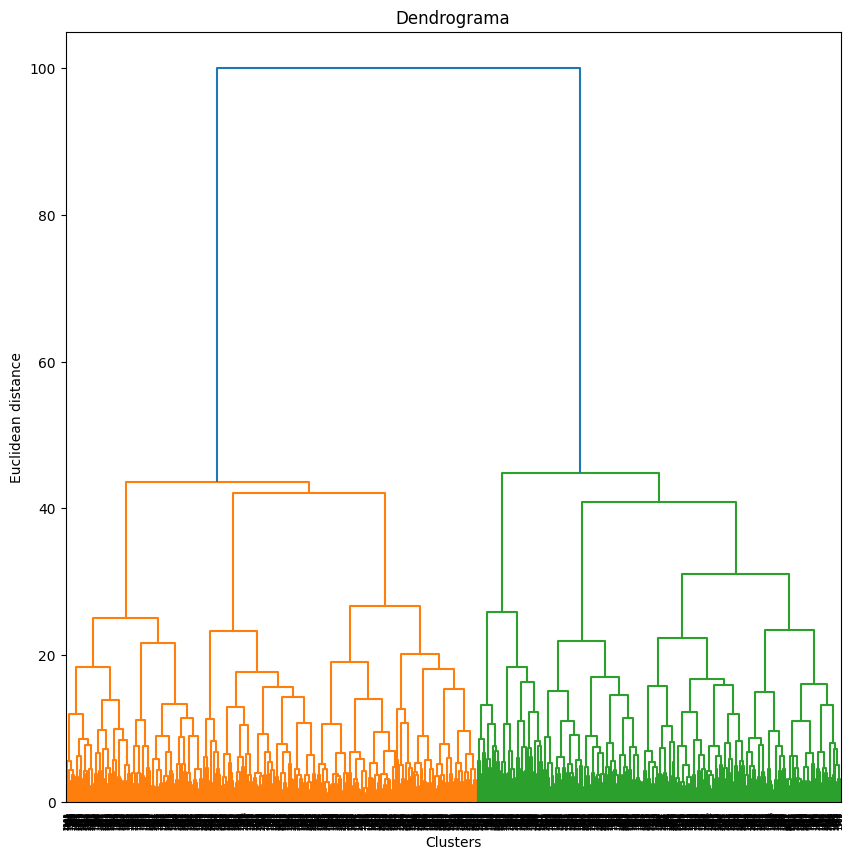

In [88]:
#With PCA
linked = linkage(pca_df,method='ward')
plt.figure(figsize=(10,10))
dendrogram_plot = dendrogram(linked)
plt.title('Dendrograma')
plt.xlabel('Clusters')
plt.ylabel('Euclidean distance')
plt.show()

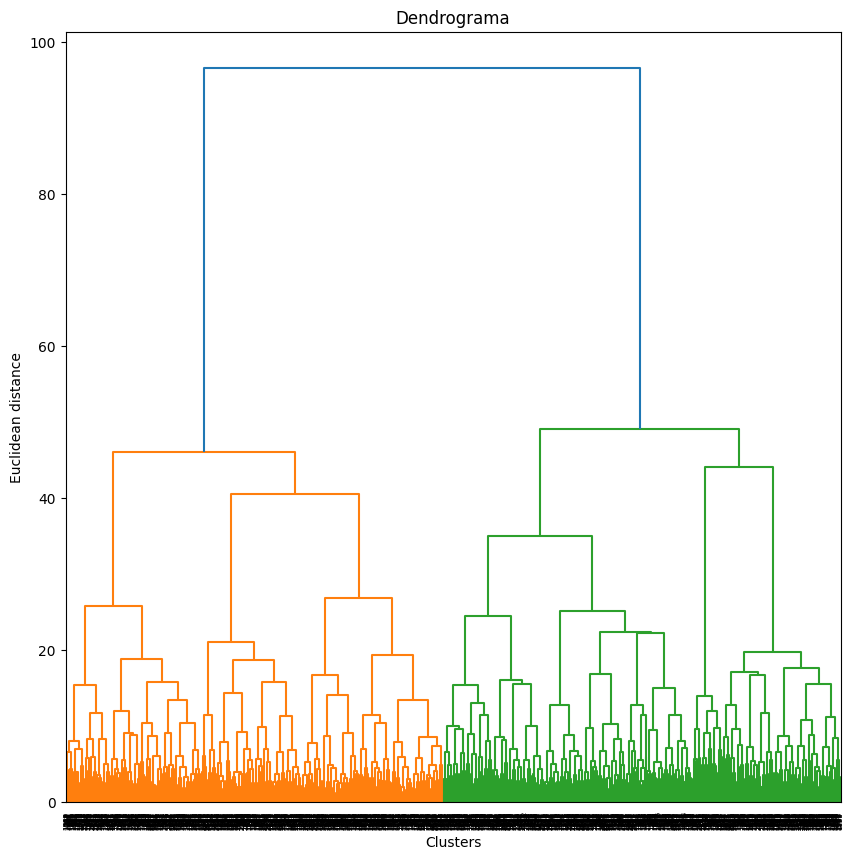

In [89]:
#With out PCA
linked = linkage(df_Scaled,method='ward')
plt.figure(figsize=(10,10))
dendrogram_plot = dendrogram(linked)
plt.title('Dendrograma')
plt.xlabel('Clusters')
plt.ylabel('Euclidean distance')
plt.show()

With PCA AG silhouette_score: 0.20827378864886098
AG silhouette_score: 0.4615167922073668


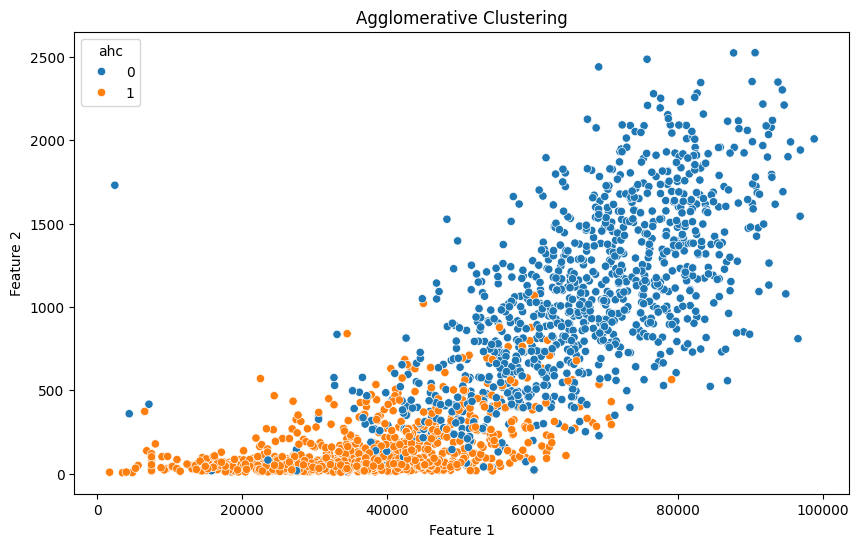

In [111]:
ag = AgglomerativeClustering(n_clusters=2,  linkage='ward')
ag_df = ag.fit_predict(df_Scaled)

ag = AgglomerativeClustering(n_clusters=2, linkage='ward')
ag_pcadf = ag.fit_predict(pca_df)

df_clustering['ahc'] = ag_df
df_clustering['ahc_pca'] = ag_pcadf
sscore['AG'] = silhouette_score(df,ag_df)
sscore['AG_PCA'] = silhouette_score(pca_df,ag_pcadf)

print('With PCA AG silhouette_score:', sscore['AG_PCA'])
print('AG silhouette_score:', sscore['AG'])

# Plot Agglomerative Clustering results
plt.figure(figsize=(10, 6))
#sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue=ag_df, palette='viridis')
sns.scatterplot(data=df_clustering,x='Income',y='Total_Expenses',hue='ahc')
plt.title('Agglomerative Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()




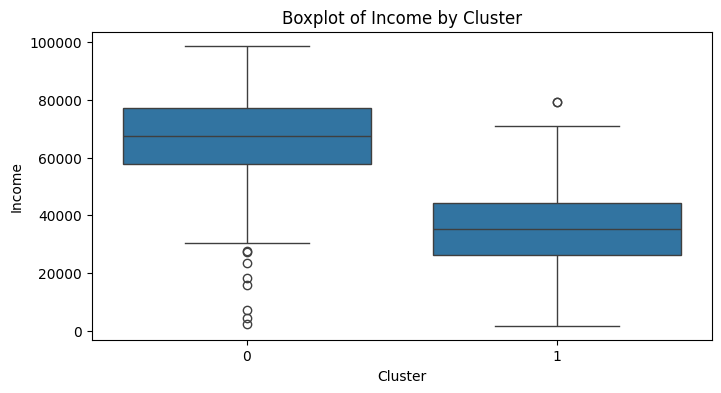

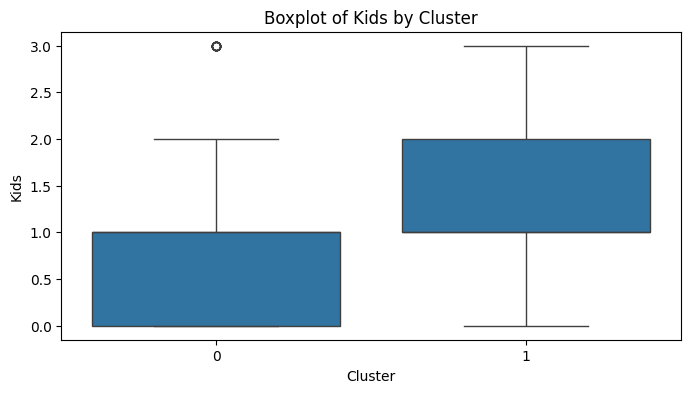

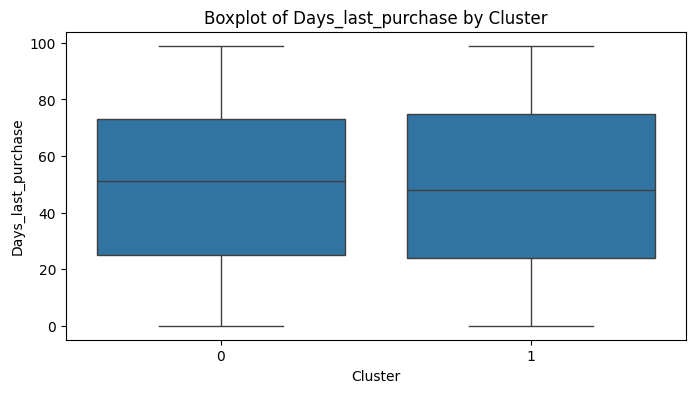

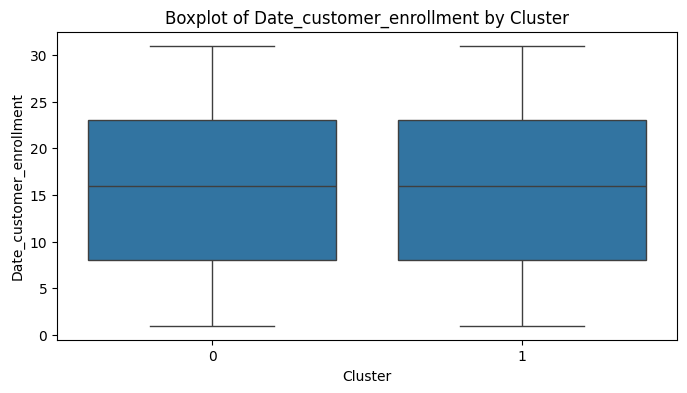

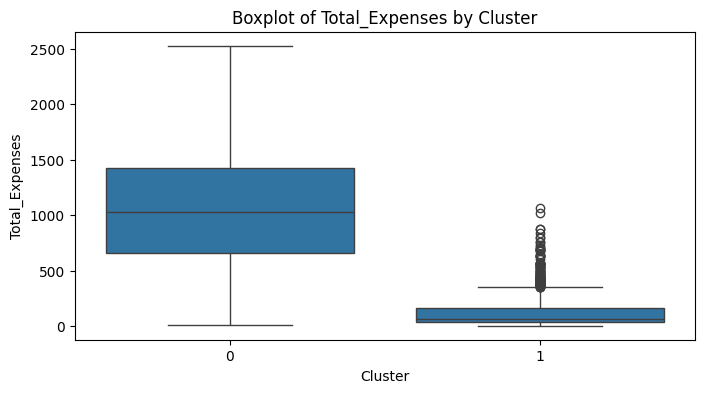

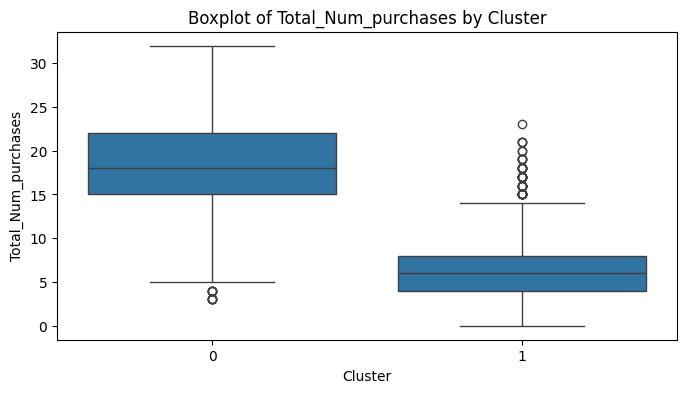

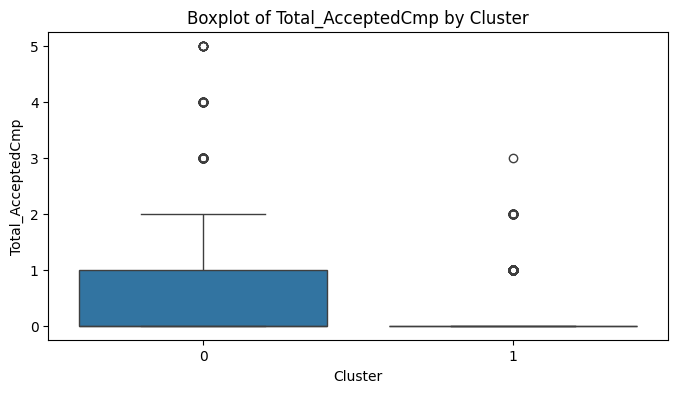

In [112]:
# Select numerical columns to plot
columns_to_plot = ['Income', 'Kids', 'Days_last_purchase', 'Date_customer_enrollment', 'Total_Expenses', 'Total_Num_purchases', 'Total_AcceptedCmp'] 

# Plot boxplots for each numerical column
for column in columns_to_plot:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='ahc', y=column, data=df_clustering)
    plt.title(f'Boxplot of {column} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(column)
    plt.show()

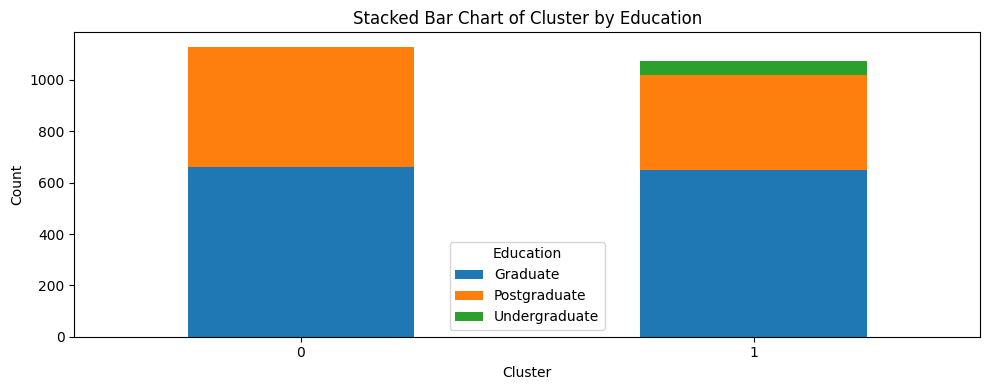

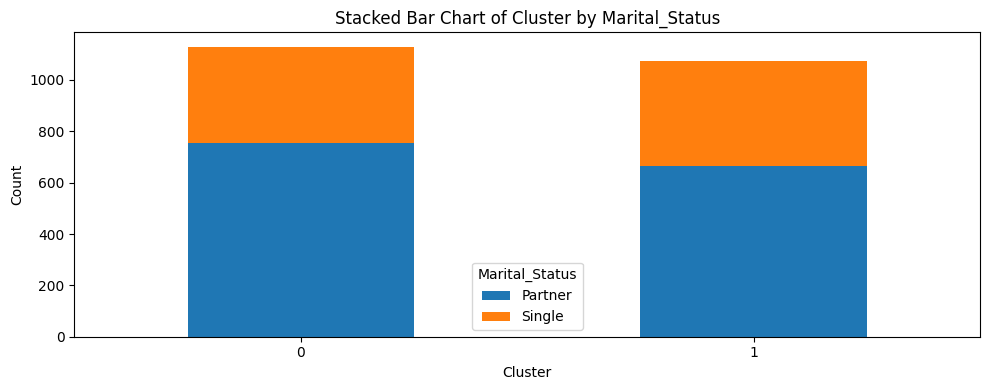

In [114]:
# List of categorical columns to plot
categorical_columns = ['Education', 'Marital_Status']

for column in categorical_columns:
    # Prepare data
    data = df_clustering.groupby(['ahc', column]).size().unstack().fillna(0)
    
    # Plot stacked bar chart
    data.plot(kind='bar', stacked=True, figsize=(10, 4))

    plt.title(f'Stacked Bar Chart of Cluster by {column}')
    plt.xlabel('Cluster')
    plt.ylabel('Count')
    plt.legend(title=column)
    plt.xticks(rotation=0)
    plt.tight_layout() 
    plt.show()

### **DBSCAN**

DBSCAN did not form any clusters.


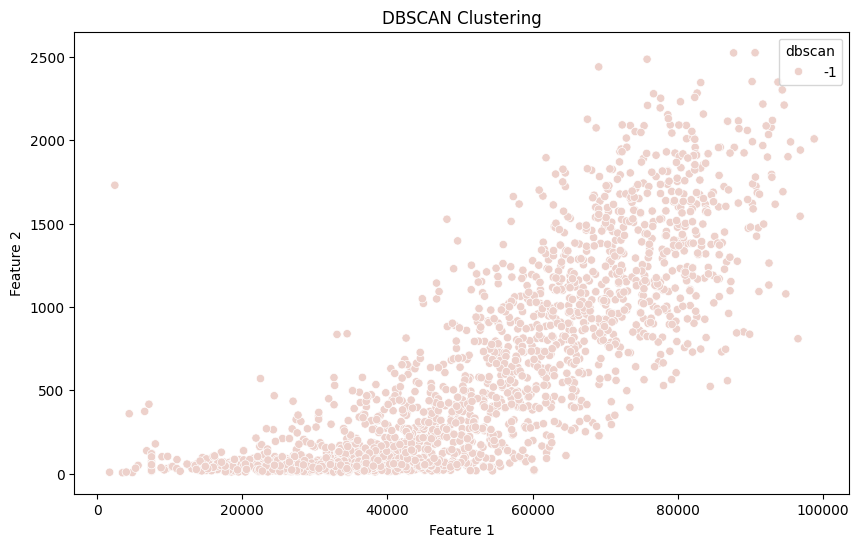

In [116]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df_clustering['dbscan'] = dbscan.fit_predict(df)

# Calculate silhouette score for DBSCAN
valid_labels = df_clustering['dbscan']!= -1
if np.any(valid_labels):
    dbscan_silhouette = silhouette_score(df[valid_labels], df_clustering['dbscan'][valid_labels])
    print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")
    sscore['dbscan'] = dbscan_silhouette
else:
    dbscan_silhouette = -1
    sscore['dbscan']= -1
    print("DBSCAN did not form any clusters.")

# Plot DBSCAN results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clustering,x='Income',y='Total_Expenses',hue='dbscan')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [115]:
# Compare Silhouette Scores
print(f"K-Means Silhouette Score: {sscore['kmeans']}")
print(f"Agglomerative Clustering Silhouette Score: {sscore['AG']}")
print(f"DBSCAN Silhouette Score: {sscore['dbscan']}")

# Higher silhouette scores indicate better-defined clusters
best_method = max(sscore['kmeans'], sscore['AG'], sscore['dbscan'])
if best_method == sscore['kmeans']:
    print("K-Means Clustering is the best method based on the Silhouette Score.")
elif best_method == sscore['AG']:
    print("Agglomerative Clustering is the best method based on the Silhouette Score.")
else:
    print("DBSCAN is the best method based on the Silhouette Score.")

K-Means Silhouette Score: 0.150433194536909
Agglomerative Clustering Silhouette Score: 0.4615167922073668
DBSCAN Silhouette Score: -1
Agglomerative Clustering is the best method based on the Silhouette Score.


## **Conclusion:**
Here I have tried to do clustering using below methods
1. **Kmeans clustering**
Tried with dimensionality reduction using PCA , since the Silhouette Score was less with pca so continued without PCA.
Optimal Clusters: Identified 3 clusters with good scores.
* **Cluster0:** 
1. Medium Income group
2. Likely they have 1 or more kids
3. Customers spend less
4. Postgraduate and undergraduate customers
5. Both partners and singles are there in the group

* **Cluster1:**
1. High Income group
2. Customers have no kid or 1 kid
3. Customers spend more
4. Graduate and postgraduate customers
5. Typically with a partner and few are singles
6. Total num of purchases are more

* **Cluster2:** 
1. Low Income group
2. Likely they have 1 or more kids
3. Customers spend less
4. It has only graduate customers
5. Both partners and singles are there in the group

2. **Agglomerative clustering:** 
Best Method: Identified as the best method for 2 clusters based on the Silhouette Score.

* **Cluster0:** 
1. High Income group
2. Graduate & postgraduate customers
3. Accepted campaigns
4. Likely no or 1  kids
5. High expenses


* **Cluster1:** 
1. Low Income group
2. Graduate, postgraduate & undergraduate customers
3. Not accepted campaigns
4. Has Kids
5. Low expenses

3. **DBSCAN clustering:**:
Performance: Low Silhouette Score and did not recognize clusters